Combine the selection thresholds: (x, y, magnitude, direction) to isolate lane-line pixels

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [7]:
import os
#os.listdir("test_images/")

#function to return all the test images
def load_images(folder):
    images = {}
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder,filename))    ####Using mping.imread
        if img is not None:
            images[filename]=img
    return images

In [8]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
     # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    grad_binary = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    dir_binary =  np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return dir_binary

def sat_thresh(img,s_thresh=(90, 255)):

    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    return s_binary

def hue_thresh(img,h_thresh=(15, 100)):

    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    
    # Threshold color channel
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    
    return h_binary

def red_thresh(img,r_thresh=(200, 255)):

    r_channel = img[:,:,0]
    
    # Threshold color channel
    r_binary = np.zeros_like(r_channel)
    r_binary[(r_channel >= r_thresh[0]) & (r_channel <= r_thresh[1])] = 1
    
    return r_binary





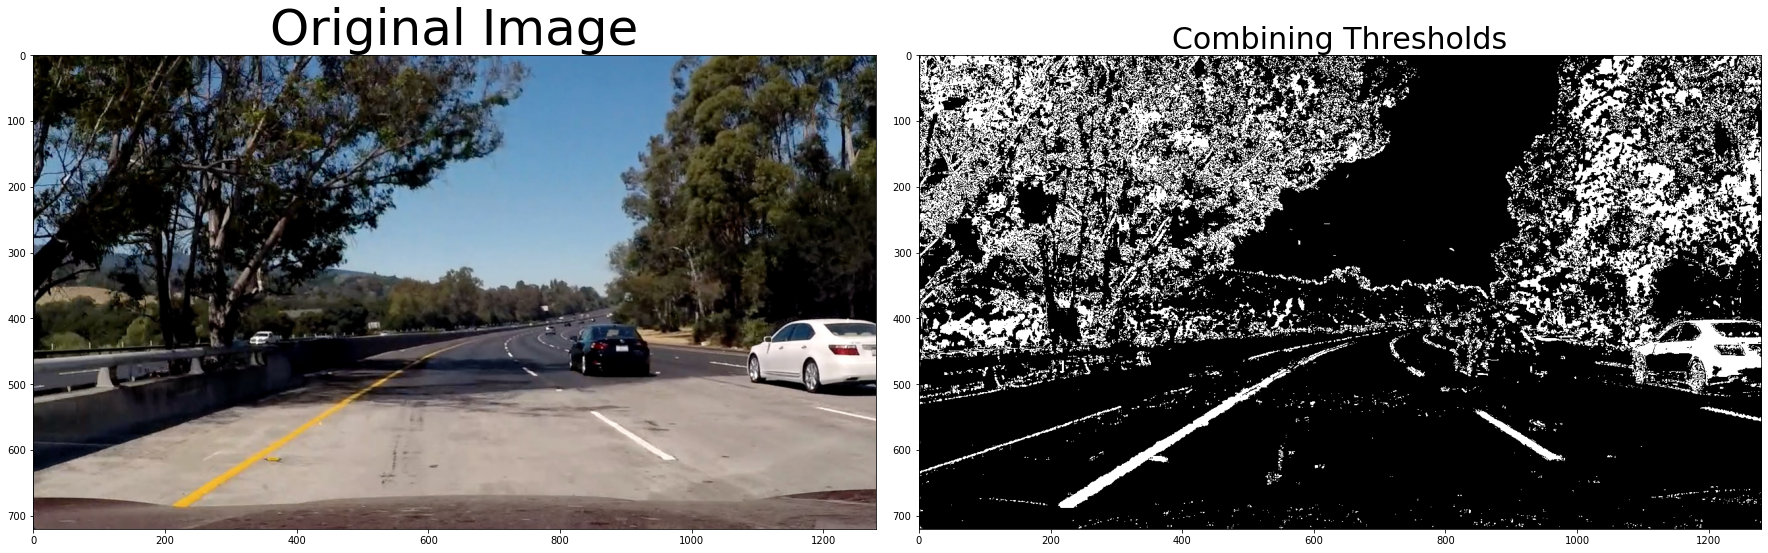

In [9]:
# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions

#images =load_images("test_images/")
                   
#for filename in images:
    
    #image=images[filename]
    
image = mpimg.imread("test_images/test5.jpg")

##Gradient_thresholding

gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(10, 150))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(10, 150))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

##Colour_thresholding
s_binary= sat_thresh(image, s_thresh=(90,255))
r_binary= red_thresh(image, r_thresh=(230,255))
h_binary= hue_thresh(image, h_thresh=(15,100))


combined = np.zeros_like(dir_binary)
#combineda = np.zeros_like(dir_binary)

combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | ((s_binary==1) & (h_binary==1)) | r_binary==1] = 1
#combineda[ ((gradx==1) & (grady==1)) | ((s_binary==1) & (h_binary==1)) | r_binary==1 ] = 1

p1 = np.zeros_like(dir_binary)
p2 = np.zeros_like(dir_binary)
p3 = np.zeros_like(dir_binary)
p4 = np.zeros_like(dir_binary)

p1[((gradx == 1) & (grady == 1))] = 1
p2[((mag_binary == 1) & (dir_binary == 1))] = 1
p3[((s_binary==1) & (h_binary==1))] = 1



# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image', fontsize=50)
#ax2.imshow(gradx, cmap='gray')
#ax2.imshow(grady, cmap='gray')
#ax2.imshow(mag_binary, cmap='gray')
#ax2.imshow(dir_binary, cmap='gray')
#ax2.imshow(s_binary, cmap='gray')
ax2.imshow(combined, cmap='gray')
ax2.set_title('Combining Thresholds', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#cv2.imwrite('test_images_outputc/{}'.format(filename),combined)

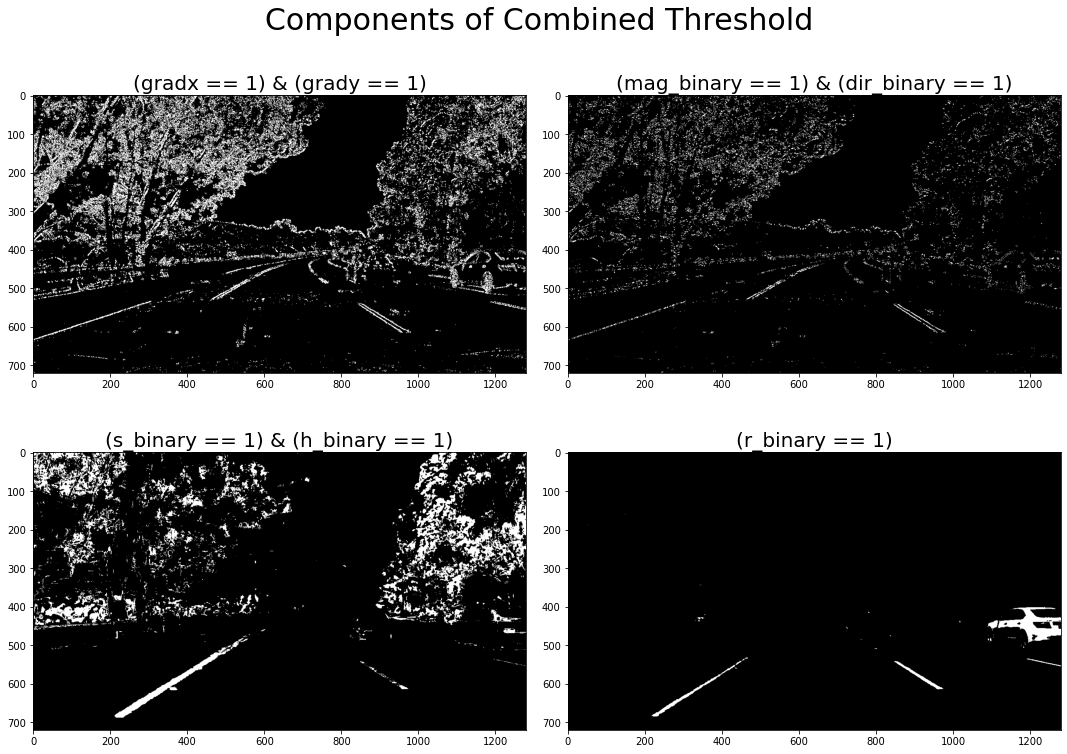

In [10]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 11))
fig.tight_layout()

ax1.imshow(p1, cmap='gray')
ax1.set_title('(gradx == 1) & (grady == 1)', fontsize=20)
ax2.imshow(p2, cmap='gray')
ax2.set_title('(mag_binary == 1) & (dir_binary == 1)', fontsize=20)
ax3.imshow(p3, cmap='gray')
ax3.set_title('(s_binary == 1) & (h_binary == 1)', fontsize=20)
ax4.imshow(r_binary, cmap='gray')
ax4.set_title('(r_binary == 1)', fontsize=20)

plt.suptitle('Components of Combined Threshold', fontsize = 30)

#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.subplots_adjust(top=0.9)

#fig.savefig('output_images/components_combined.jpg')